Datos de https://www.kaggle.com/gulsahdemiryurek/harry-potter-dataset#Harry Potter 3.csv

In [1]:
import pandas as pd
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
from stop_words import get_stop_words
from collections import Counter
import matplotlib.pyplot as plt
import nltk
import re
import numpy as np

from PIL import Image

plt.style.use('https://raw.githubusercontent.com/datatrooper/instatrooper/master/styles/bluetrooper.mplstyle')
dp = [
    "#e6d3ad",
    "#967B4F",
    "#46493D",
    "#839DA5",
    "#9FADAD",
    "#2B4144",
    "#986E37"
]

In [2]:
df1 = pd.read_csv("../../../data/hp/Harry Potter 1.csv", sep=";")
df1["Sentence"] = df1["Sentence"].str.lower()
df1["Character"] = df1["Character"].str.strip().str.lower()


In [3]:
df2 = pd.read_csv("../../../data/hp/Harry Potter 2.csv", sep=";")
df2["Sentence"] = df2["Sentence"].str.lower()
df2["Character"] = df2["Character"].str.strip().str.lower()


In [4]:
df3 = pd.read_csv("../../../data/hp/Harry Potter 3.csv", sep=";").rename(columns={"CHARACTER":"Character",
                                                                                  "SENTENCE": "Sentence"})
df3["Sentence"] = df3["Sentence"].str.lower()
df3["Character"] = df3["Character"].str.strip().str.lower()


In [5]:
df_total = pd.concat([df1,df2,df3], ignore_index=True)

In [6]:
df_total[df_total["Character"] == "draco"] = "malfoy"

## Wordclouds by characters

In [7]:
charact = "malfoy"
df_char = df_total[df_total["Character"] == charact]
df_char["Sentence"] = df_char["Sentence"].str.replace('[^\w\s]','')
words = df_char["Sentence"].str.cat(sep=' ').lower().split(" ")

stopwords = [s.replace('[^\w\s]','') for s in get_stop_words('en')]
mylist = ["gets", "The", "scene", "-", "get", "think", "come", "just", "know", "see", "got", "go", "can",
          "like", "one", "well", "now", "right", "going", "will", "im", "dont", "hes", "thats", "didnt",
          "whats", "youre", "us", "oh", "cant", "ive", "arent", "isnt", "youve", "malfoy", "thought"]
stopwords.extend(mylist)
words = [word for word in words if word not in stopwords]
word_count = Counter(words)


/home/davinchi/Documents/Projects/instatrooper/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
def white_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "rgb(230, 217, 168)" 

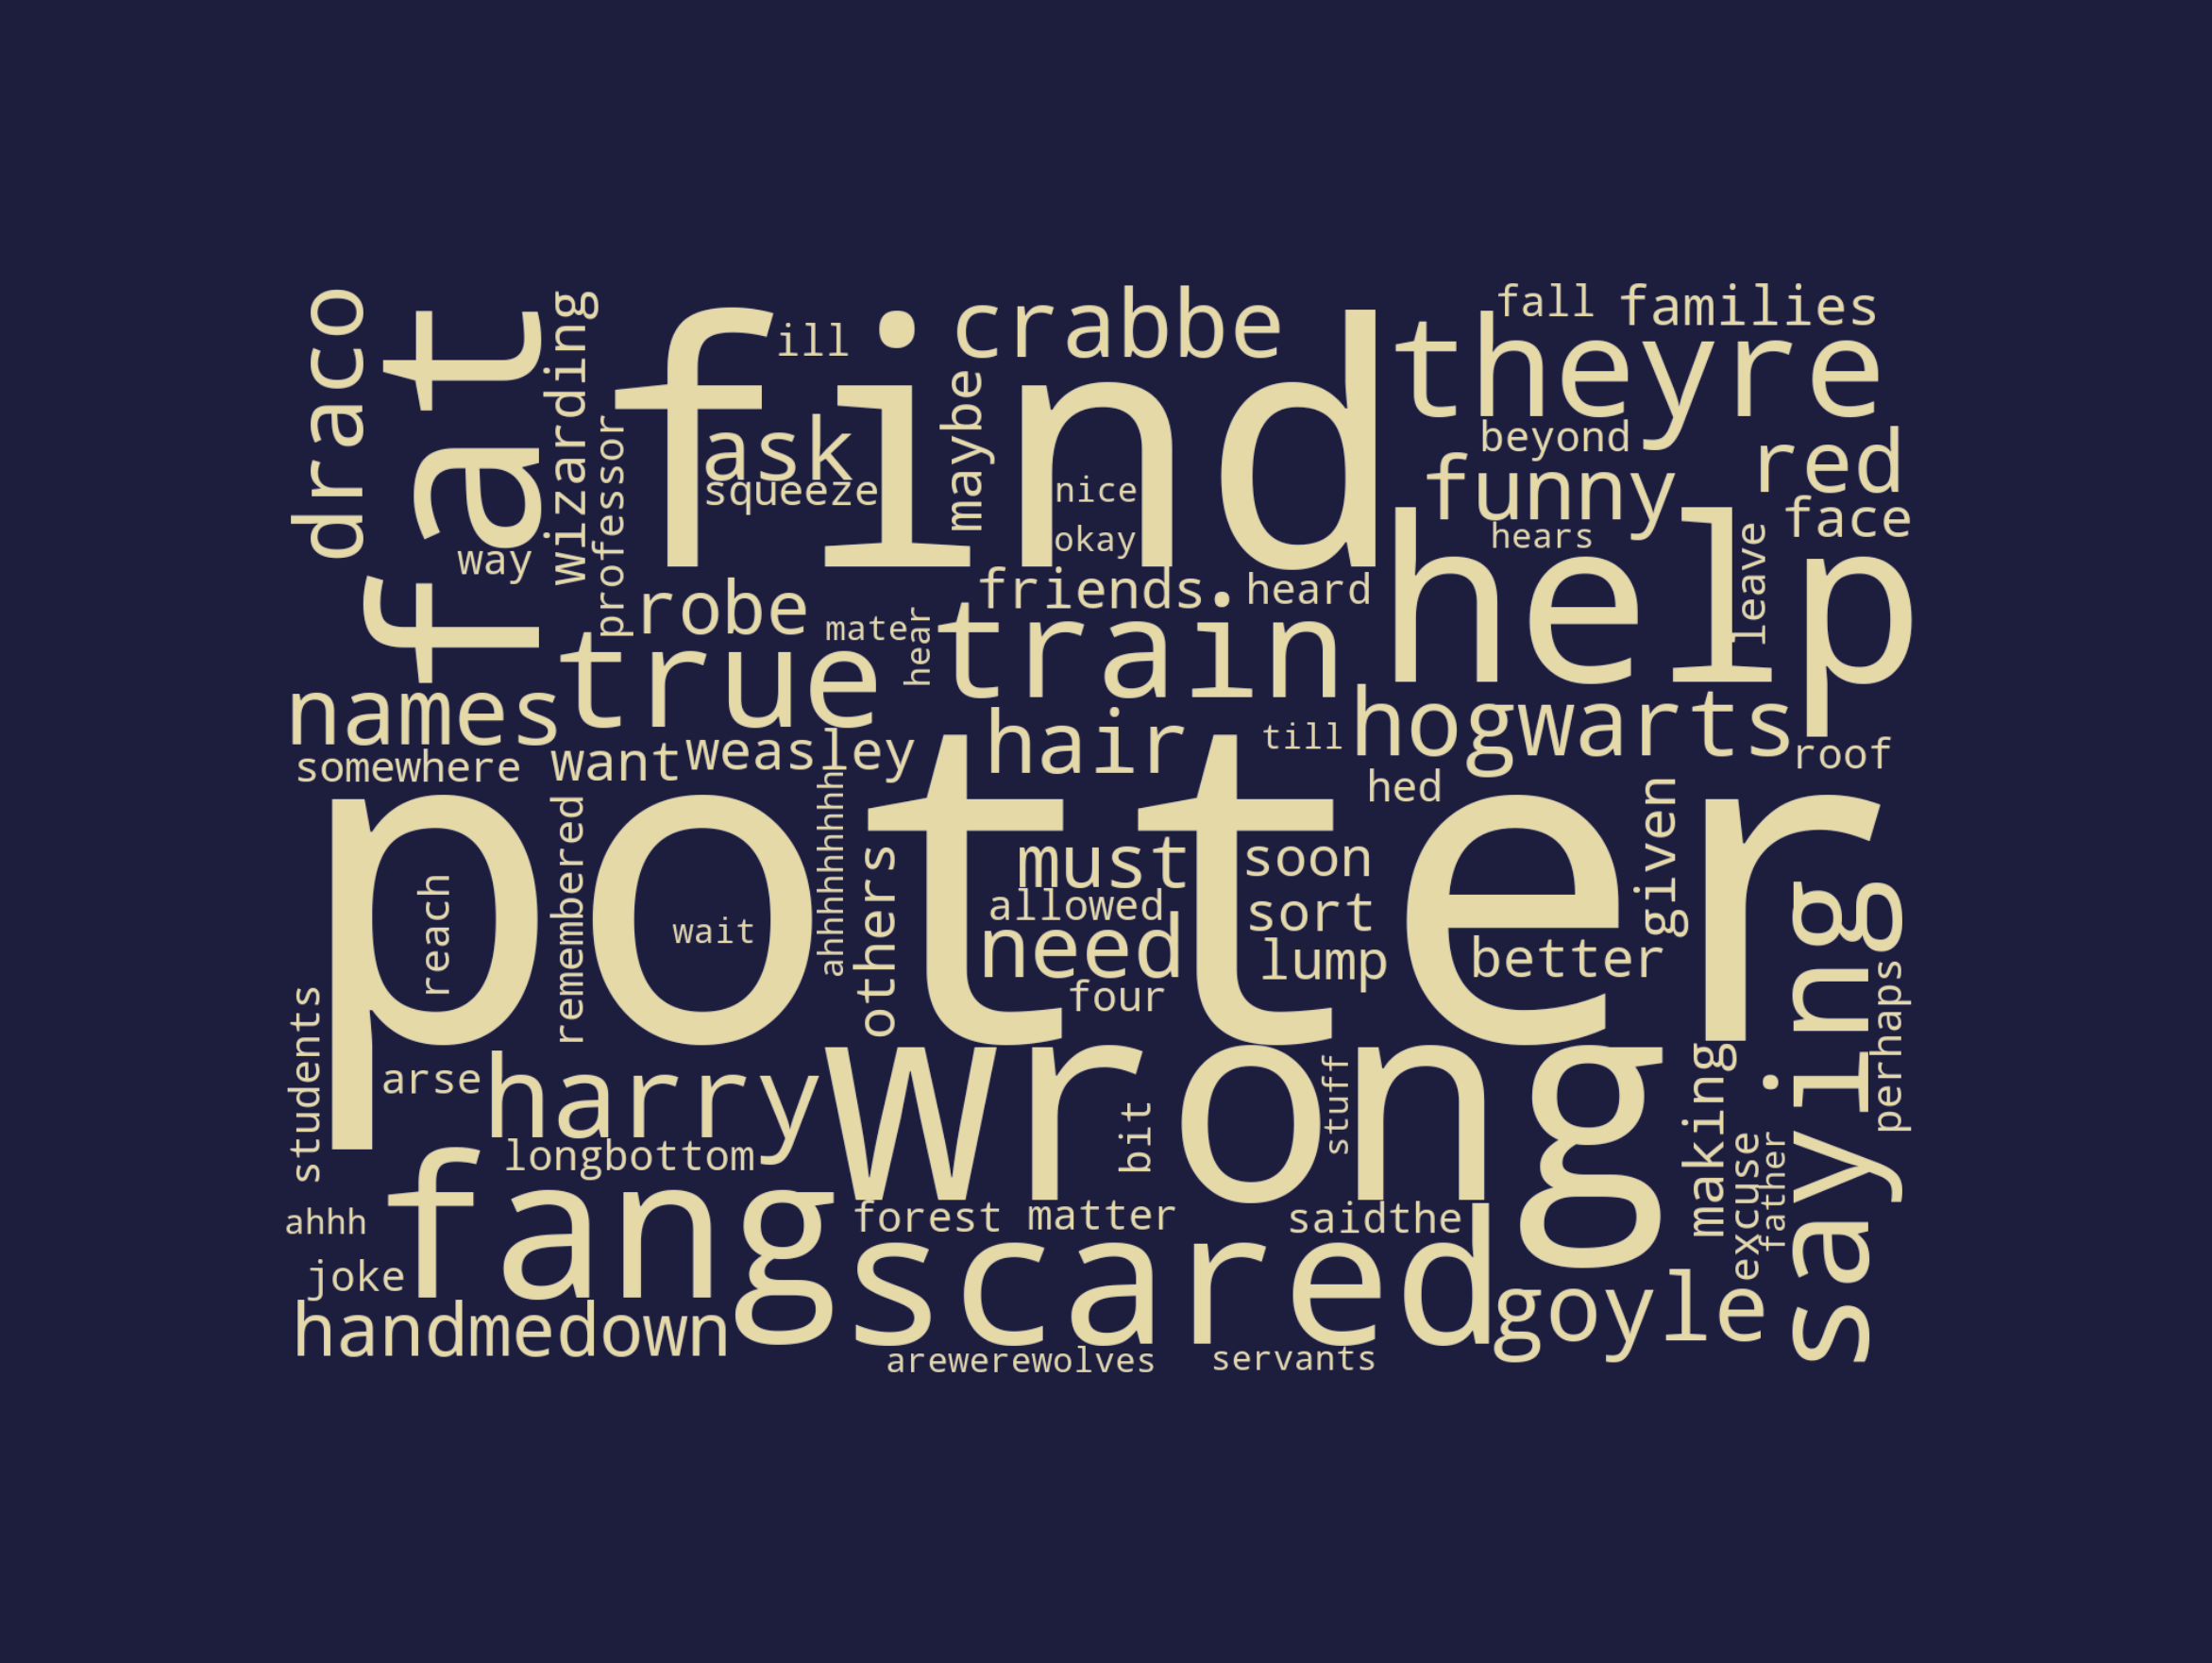

In [9]:
wc = WordCloud(background_color="rgba(255, 255, 255, 0)", mode="RGBA",
               width=1500, 
               height=1000).generate_from_frequencies(word_count)
wc.recolor(color_func=white_color_func, random_state=3)

fig = plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig(f'charact.png',bbox_inches='tight', transparent="True", pad_inches = 0)
plt.show()

## Wordclouds by book

In [165]:
book_num = 7

In [166]:
b = open(f"../../../data/hp/book{book_num}.txt", "r")
text = b.read()
text = re.sub(r"[^\w\d'\s]+",'',text).split()
# blob = TextBlob(text)
# blob.noun_phrases

In [167]:
stopwords = get_stop_words('en')
mylist = ["Harry", "Ron", "Hermione", "Dumbledore", "Professor"]
stopwords.extend(mylist)
words = [word for word in text if word not in stopwords]
words = [word for word in words if "'" not in word]
word_count = Counter(words)

In [168]:
is_noun = lambda pos: pos == 'NNP'
nouns = [word for (word, pos) in nltk.pos_tag(word_count.keys()) if is_noun(pos)] 

In [169]:
word_nouns = dict([(n, word_count[n]) for n in nouns])

In [170]:
glasses_mask = np.array(Image.open("hp1.png"))

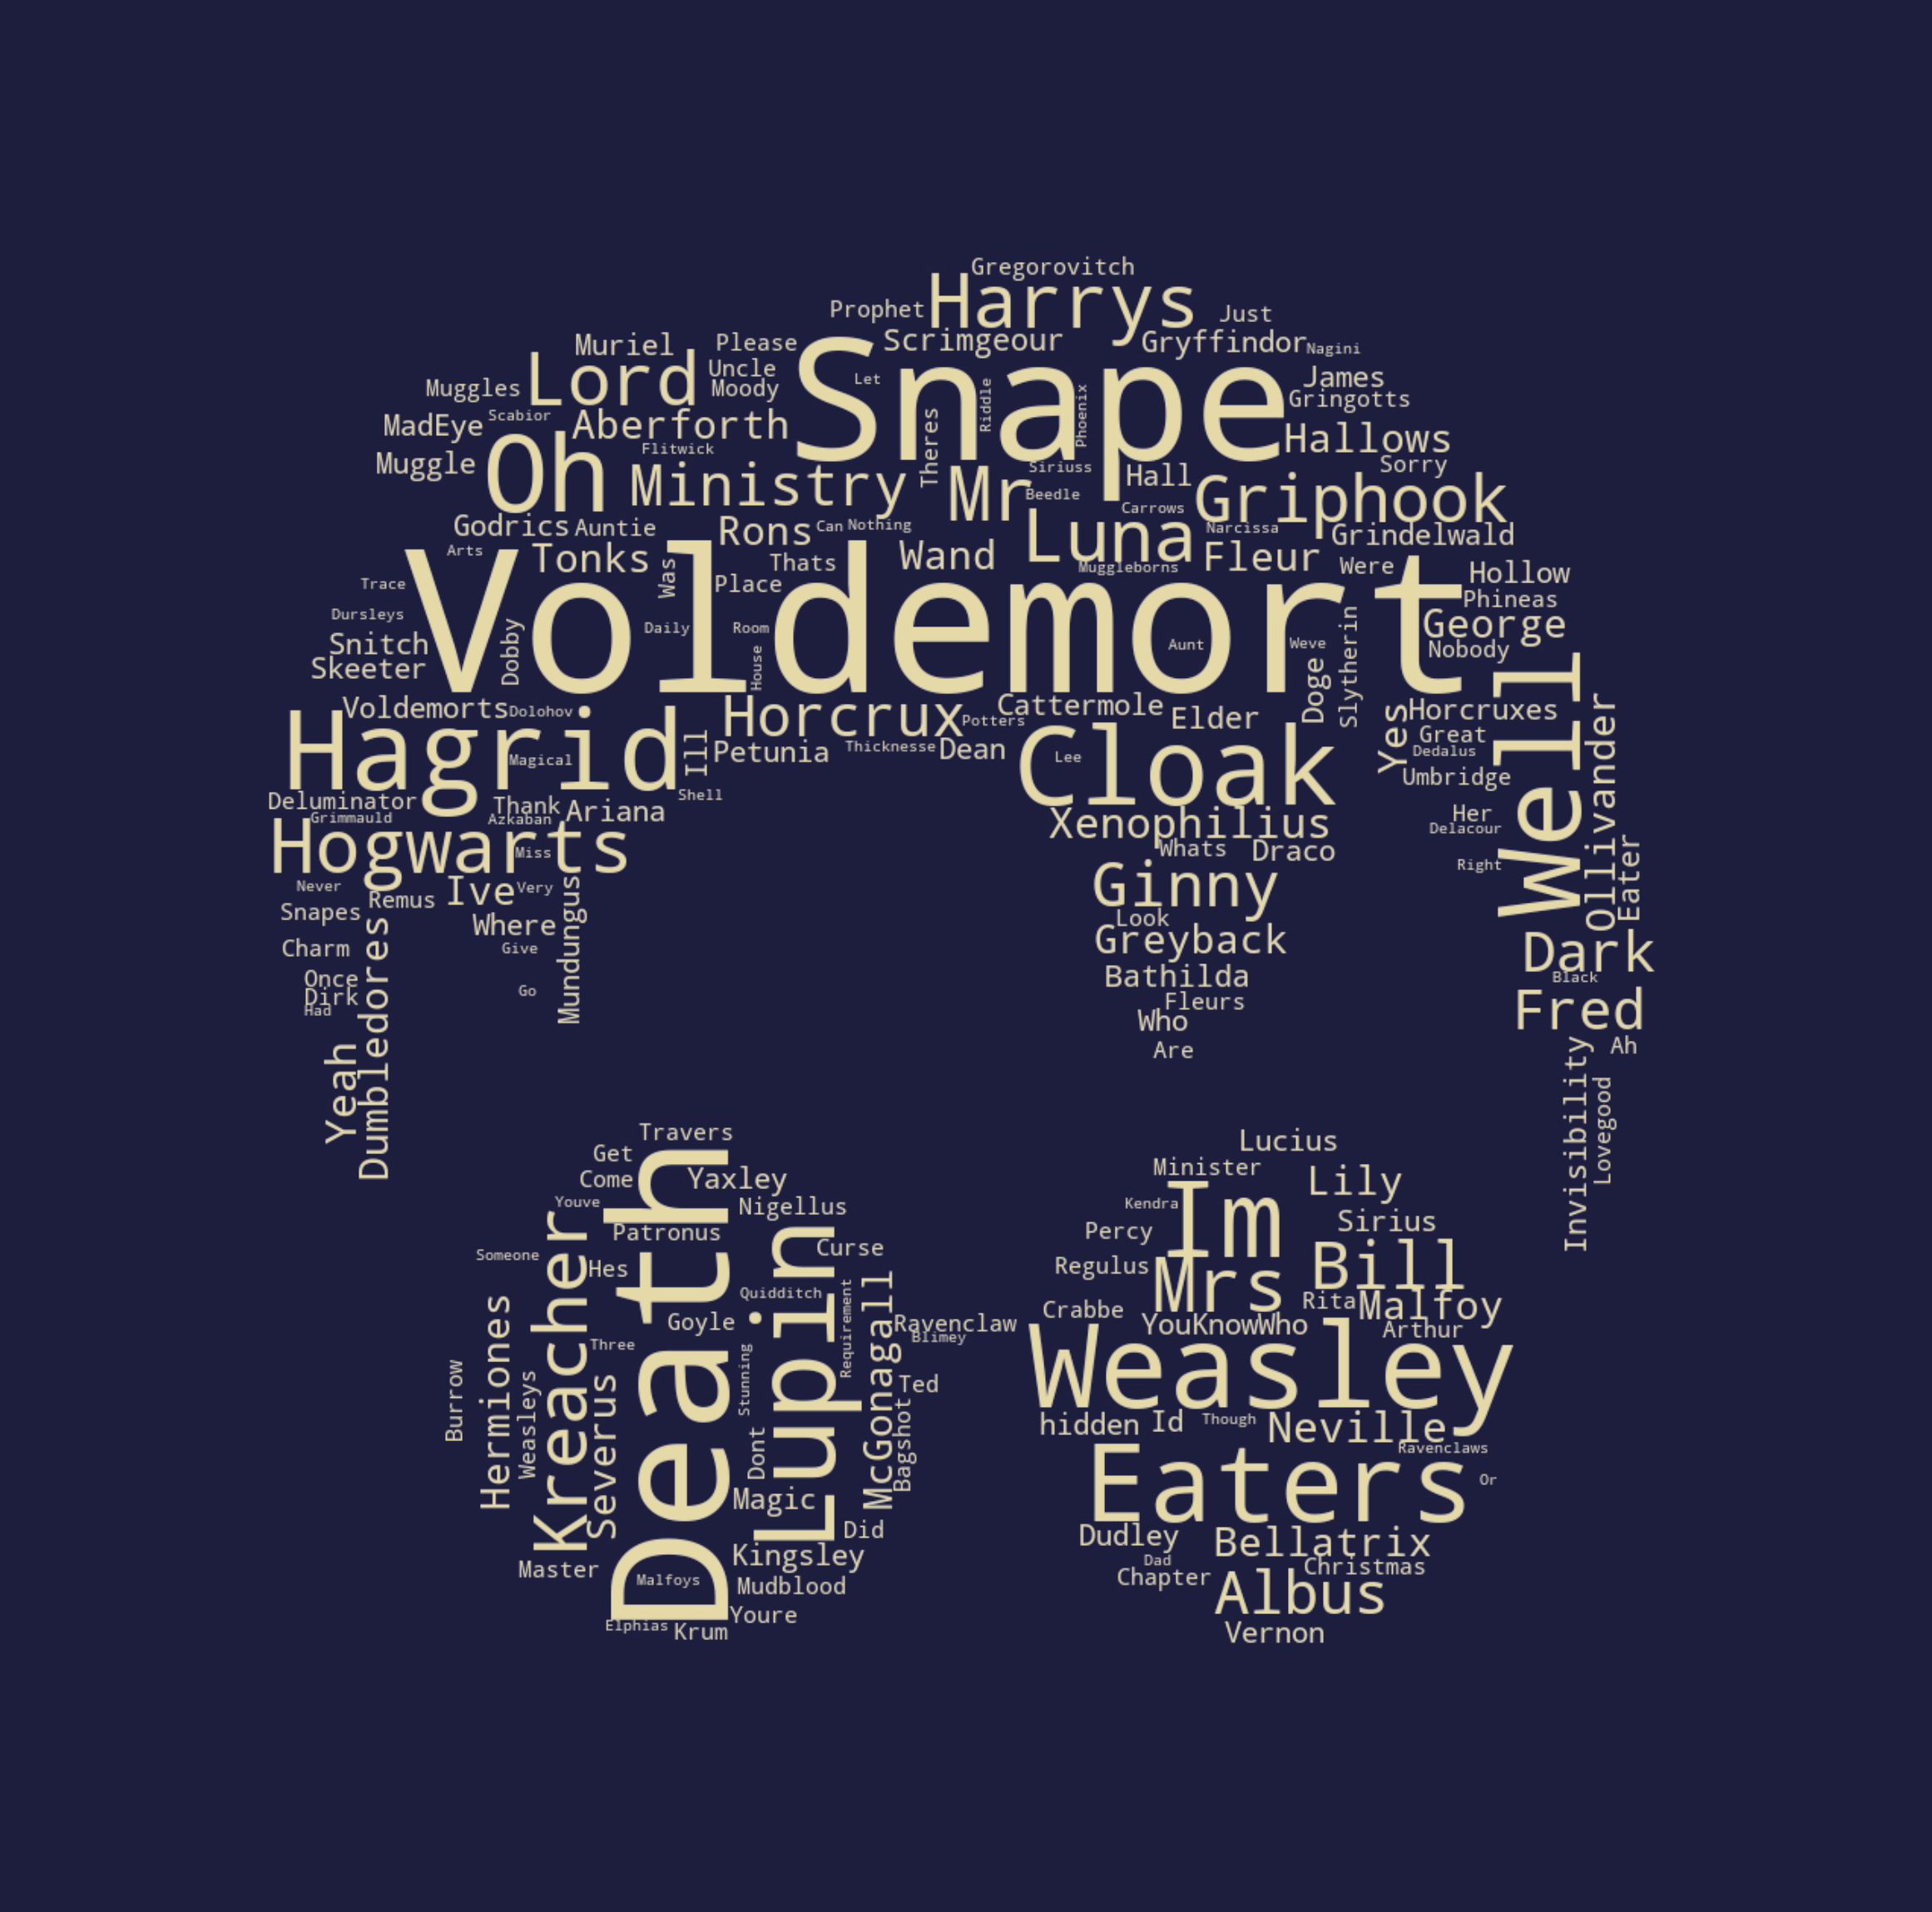

In [171]:
wc = WordCloud(background_color="rgba(255, 255, 255, 0)", mode="RGBA",
               width=1000, 
               height=1500,
               mask=glasses_mask).generate_from_frequencies(word_nouns)
wc.recolor(color_func=white_color_func, random_state=336)

fig = plt.figure(figsize=(20,15))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig(f'wc_book{book_num}.png',bbox_inches='tight', transparent="True", pad_inches = 0)
plt.show()

### Sentiment

In [185]:
total_pols = []
for i in (1,2,3,4,5,6,7):
    b = open(f"../../../data/hp/book{i}.txt", "r")
    text = b.read()
    blob = TextBlob(text)
    pols = []
    for sentence in blob.sentences:
        pols.append(sentence.sentiment.polarity)

    total_pols.append(np.mean(pols))


In [186]:
total_pols

[0.027459501622697308,
 0.02364984280236009,
 0.01814452649890328,
 0.024852972928718138,
 0.01897265037953895,
 0.03323781375988205,
 0.024062578736926313]

### Spells

In [389]:
df_spells = pd.read_csv("../../../data/hp/Spells.csv", sep=";")
df_spells.head()

,Name,Incantation,Type,Effect,Light
0,Summoning Charm,Accio,Charm,Summons an object,None
1,Age Line,Unknown,Charm,Prevents people above or below a certain age f...,Blue
2,Water-Making Spell,Aguamenti,"Charm, Conjuration",Conjures water,Icy blue
3,Launch an object up into the air,Alarte Ascendare,Charm,Rockets target upward,Red
4,Albus Dumbledore's Forceful Spell,Unknown,Spell,Great Force,None


In [513]:
incants = df_spells["Incantation"].unique()
incants = incants[incants != "Unknown"]
incants = incants[incants != 'None']
incants = incants[incants != 'Pack']
incants = [x for x in incants if str(x) != 'nan']
incants = [i.lower() for i in incants]

In [618]:
b = open(f"../../../data/hp/book7.txt", "r")
text = b.read().lower().replace("definitely","")

In [619]:
cuentas ={ }
for inc in incants:
    if text.count(inc) >0:
        cuentas[inc] = text.count(inc)

In [620]:
df_spell_count = pd.Series(cuentas).to_frame("cuenta").sort_values("cuenta", ascending=False).reset_index().rename(columns={"index":"Spell"})
df_spell_count

,Spell,cuenta
0,accio,12
1,stupefy,9
2,expelliarmus,8
3,finite,8
4,protego,7
5,avada kedavra,7
6,imperio,6
7,expecto patronum,6
8,lumos,6
9,crucio,4


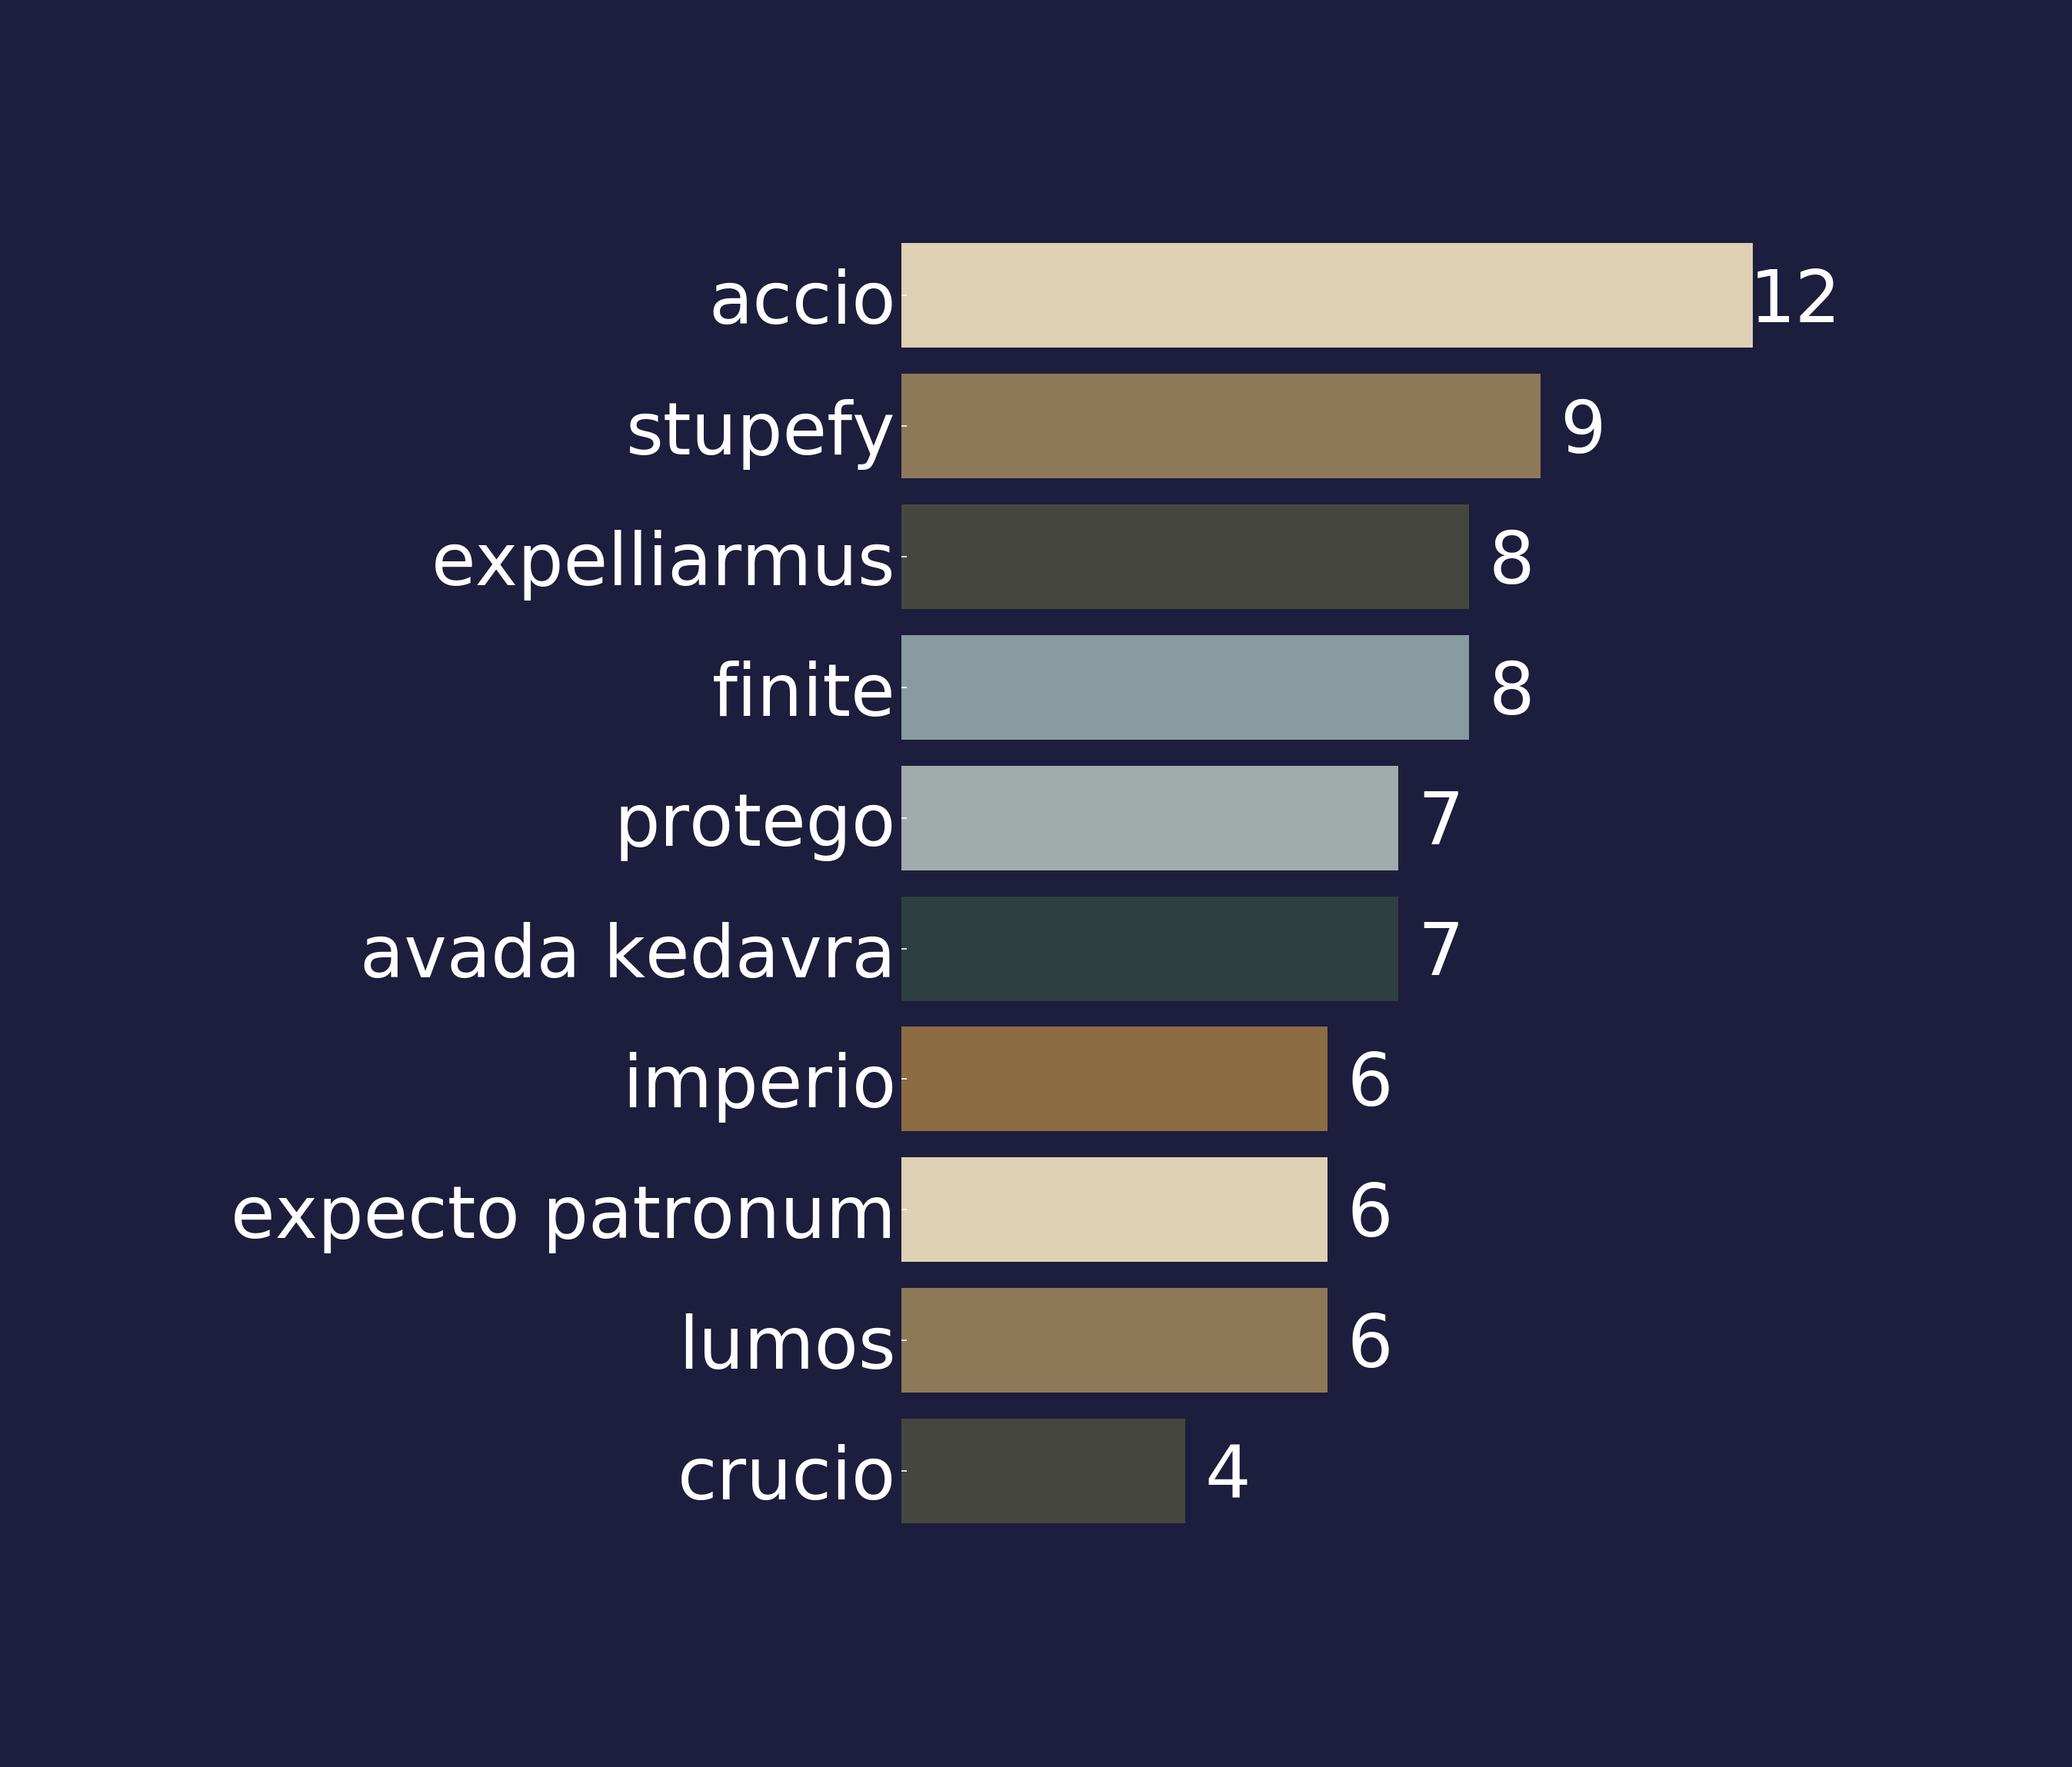

In [621]:
fig = plt.figure(figsize=(10,15))
ax = sns.barplot(y="Spell", x="cuenta", orient="h", data=df_spell_count.head(10), palette = dp)
plt.grid(False)

ax.set_xlabel("", fontsize=30)
plt.xticks([])
plt.box(False)
ax.set_ylabel("", fontsize=30)



# jugar con estos valores
vertical_offset = 0.2
horizontal_offset = 0.6

ax.tick_params(axis='both', which='major', labelsize=45)
for index, row in df_spell_count.head(10).iterrows():
    ax.text(row["cuenta"] + horizontal_offset,index+vertical_offset, # posicion
            row["cuenta"], # texto
            color='white', 
            ha="center", 
            size=45)
    
plt.savefig(f'spell7.png',bbox_inches='tight', transparent="True", pad_inches = 0)
plt.show()